<a id="lb"></a>
<div style="background-color: #4b0082; font-family: 'Times New Roman', serif; font-size: 36px; color: #e0e0e0; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #e0e0e0; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>Adversarial Resilience: A Zero Trust Approach to Securing ML Models</b></div>

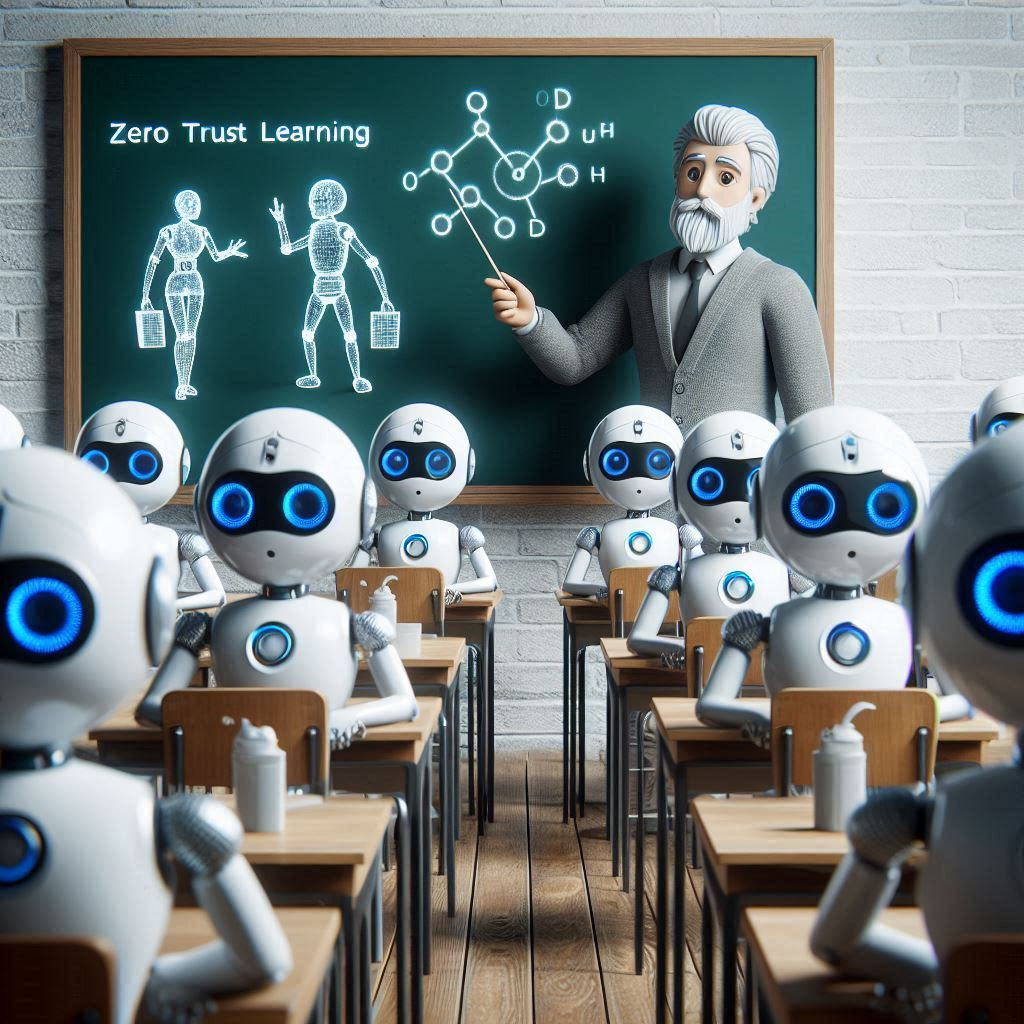

<a id="lb"></a>
# <div style="background-color: #4b0082; font-family: 'Times New Roman', serif; font-size: 36px; color: #e0e0e0; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #e0e0e0; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>What is Zero Trust Learning?
</b></div>
Zero Trust Learning refers to the application of Zero Trust security principles to machine learning (ML) systems, focusing on securing the data, models, and learning processes from potential threats. Just as Zero Trust in cybersecurity means "never trust, always verify," Zero Trust Learning operates under the assumption that no part of the machine learning lifecycle (from data sources to model deployment) can be implicitly trusted. Every interaction, entity, and process in the pipeline must be continuously verified and authenticated.

In this notebook, we will address adversarial resilience by applying a Zero Trust approach to securing machine learning models. We will implement a pipeline that protects the ML model from adversarial attacks through rigorous verification, model integrity checks, and access control policies. The Zero Trust principle mandates continuous verification and assumes no implicit trust, even within the system itself.

**Steps Involved:**

**Dataset:** We will use the CIFAR-10 dataset.

**Model:** A simple convolutional neural network (CNN) will be trained.

**Adversarial Attacks:** The Fast Gradient Sign Method (FGSM) will be used to generate adversarial examples.

**Zero Trust Access Control:** We will implement token-based access and encryption for secure model access.

**Adversarial Defense Mechanisms**

Adversarial Training to make the model robust to adversarial attacks.

Model Integrity Check with hashing.

Access Logging and Monitoring.


<a id="lb"></a>
# <div style="background-color: #4b0082; font-family: 'Times New Roman', serif; font-size: 36px; color: #e0e0e0; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #e0e0e0; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>Install and Import Required Libraries</b></div>

<a id="lb"></a>
# <div style="background-color: #4b0082; font-family: 'Times New Roman', serif; font-size: 36px; color: #e0e0e0; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #e0e0e0; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>Import Libraries</b></div>

In [49]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from cryptography.fernet import Fernet
import hashlib
import logging

<a id="lb"></a>
# <div style="background-color: #4b0082; font-family: 'Times New Roman', serif; font-size: 36px; color: #e0e0e0; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #e0e0e0; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>Dataset Preparation (CIFAR-10)</b></div>

The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 different classes

In [50]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images to a pixel value range of 0 to 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert the labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Display the shape of the dataset
print(f"Training data shape: {x_train.shape}, Test data shape: {x_test.shape}")


Training data shape: (50000, 32, 32, 3), Test data shape: (10000, 32, 32, 3)


<a id="lb"></a>
# <div style="background-color: #4b0082; font-family: 'Times New Roman', serif; font-size: 36px; color: #e0e0e0; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #e0e0e0; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>CNN Model Definition</b></div>

We define a simple CNN architecture to classify the CIFAR-10 dataset.

In [51]:
# Define a simple CNN model
def create_cnn_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

# Create and compile the CNN model
model = create_cnn_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model on the CIFAR-10 dataset
model.fit(x_train, y_train, epochs=30, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/30
782/782 [==============================] - 25s 30ms/step - loss: 1.5595 - accuracy: 0.4300 - val_loss: 1.2900 - val_accuracy: 0.5353
Epoch 2/30
782/782 [==============================] - 23s 30ms/step - loss: 1.2079 - accuracy: 0.5728 - val_loss: 1.1512 - val_accuracy: 0.5997
Epoch 3/30
782/782 [==============================] - 24s 30ms/step - loss: 1.0436 - accuracy: 0.6353 - val_loss: 1.0030 - val_accuracy: 0.6503
Epoch 4/30
782/782 [==============================] - 23s 29ms/step - loss: 0.9457 - accuracy: 0.6691 - val_loss: 0.9623 - val_accuracy: 0.6659
Epoch 5/30
782/782 [==============================] - 24s 30ms/step - loss: 0.8722 - accuracy: 0.6959 - val_loss: 0.9622 - val_accuracy: 0.6700
Epoch 6/30
782/782 [==============================] - 23s 29ms/step - loss: 0.8135 - accuracy: 0.7173 - val_loss: 0.9126 - val_accuracy: 0.6838
Epoch 7/30
782/782 [==============================] - 23s 29ms/step - loss: 0.7618 - accuracy: 0.7340 - val_loss: 0.8413 - val_accuracy:

<a id="lb"></a>
# <div style="background-color: #4b0082; font-family: 'Times New Roman', serif; font-size: 36px; color: #e0e0e0; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #e0e0e0; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>Generate Adversarial Examples (FGSM)</b></div>

We use the Fast Gradient Sign Method (FGSM) to generate adversarial examples, which perturbs the input image to fool the model into making incorrect predictions.

In [52]:
# FGSM Attack
def generate_adversarial_examples(model, images, labels, epsilon=0.01):
    images = tf.convert_to_tensor(images)
    labels = tf.convert_to_tensor(labels)

    with tf.GradientTape() as tape:
        tape.watch(images)
        predictions = model(images)
        loss = tf.keras.losses.categorical_crossentropy(labels, predictions)

    gradients = tape.gradient(loss, images)
    adversarial_images = images + epsilon * tf.sign(gradients)
    adversarial_images = tf.clip_by_value(adversarial_images, 0, 1)
    
    return adversarial_images

# Generate adversarial images on the test set
x_test_adv = generate_adversarial_examples(model, x_test[:100], y_test[:100])

# Evaluate model performance on adversarial examples
test_loss, test_acc = model.evaluate(x_test_adv, y_test[:100], verbose=0)
print(f"Model accuracy on adversarial examples: {test_acc:.2f}")

Model accuracy on adversarial examples: 0.18


<a id="lb"></a>
# <div style="background-color: #4b0082; font-family: 'Times New Roman', serif; font-size: 36px; color: #e0e0e0; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #e0e0e0; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>Adversarial Training</b></div>

We will augment our training process by adding adversarial examples to the training data to make the model more resilient to adversarial attacks.

In [53]:
# Create adversarial examples for training
x_train_adv = generate_adversarial_examples(model, x_train[:1000], y_train[:1000])

# Combine the original and adversarial examples
x_train_combined = np.concatenate((x_train[:1000], x_train_adv))
y_train_combined = np.concatenate((y_train[:1000], y_train[:1000]))

# Retrain the model on the combined dataset
model.fit(x_train_combined, y_train_combined, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the retrained model on adversarial examples
test_loss, test_acc = model.evaluate(x_test_adv, y_test[:100], verbose=0)
print(f"Adversarially trained model accuracy on adversarial examples: {test_acc:.2f}")

Epoch 1/10
32/32 [==============================] - 2s 74ms/step - loss: 1.7018 - accuracy: 0.5950 - val_loss: 1.4143 - val_accuracy: 0.6021
Epoch 2/10
32/32 [==============================] - 2s 63ms/step - loss: 0.6767 - accuracy: 0.7515 - val_loss: 1.3156 - val_accuracy: 0.6337
Epoch 3/10
32/32 [==============================] - 2s 65ms/step - loss: 0.3464 - accuracy: 0.8745 - val_loss: 1.3677 - val_accuracy: 0.6362
Epoch 4/10
32/32 [==============================] - 2s 63ms/step - loss: 0.2004 - accuracy: 0.9370 - val_loss: 1.4361 - val_accuracy: 0.6393
Epoch 5/10
32/32 [==============================] - 2s 65ms/step - loss: 0.1242 - accuracy: 0.9760 - val_loss: 1.5115 - val_accuracy: 0.6388
Epoch 6/10
32/32 [==============================] - 2s 65ms/step - loss: 0.0833 - accuracy: 0.9865 - val_loss: 1.5813 - val_accuracy: 0.6425
Epoch 7/10
32/32 [==============================] - 2s 65ms/step - loss: 0.0560 - accuracy: 0.9940 - val_loss: 1.6334 - val_accuracy: 0.6404
Epoch 8/10
32

<a id="lb"></a>
# <div style="background-color: #4b0082; font-family: 'Times New Roman', serif; font-size: 36px; color: #e0e0e0; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #e0e0e0; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>Zero Trust: Token-Based Access Control</b></div>

We implement Zero Trust access control using token-based authentication and encryption to ensure that only authorized users can access the model.

In [54]:
# Generate a secure encryption key
key = Fernet.generate_key()
cipher_suite = Fernet(key)

# Token-based authentication function
def authenticate_user(token):
    try:
        cipher_suite.decrypt(token)
        return "Access Granted"
    except:
        return "Access Denied"

# Create a token for user access
user_token = cipher_suite.encrypt(b"user_access")
print(authenticate_user(user_token))  # Should print "Access Granted"

Access Granted


<a id="lb"></a>
# <div style="background-color: #4b0082; font-family: 'Times New Roman', serif; font-size: 36px; color: #e0e0e0; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #e0e0e0; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>Model Integrity Check
</b></div>

To ensure that the model hasn't been tampered with, we will generate a hash of the model's architecture and weights. This can be verified at any point in time to check the model's integrity.

In [55]:
# Function to compute model hash
def compute_model_hash(model):
    model_json = model.to_json()
    model_weights = model.get_weights()
    
    hash_val = hashlib.sha256(model_json.encode()).hexdigest()
    for weight in model_weights:
        hash_val += hashlib.sha256(weight.tobytes()).hexdigest()
    
    return hash_val

# Compute and print the model hash
model_hash = compute_model_hash(model)
print(f"Model Hash: {model_hash}")

Model Hash: ed0201d9c9d2d217c7c3ca00b99094bb50da424333777b98a48caea7c6509a81ac9599fffe2fc52ce660a53a9cc147a4a84c9e0bccf6aa059743923977ae17abc9ea5407120da046a941cf8af3bbb5de7a9a891d45ccf7630334e1dd7ea7ef1e7be495edf8bad1b285678a89da6d2d0a6134210ab3609416c8c851036a98d274e8366f826a1db56bbc548b00b3513139c5f0f6b372b21024a054d3c2ee530749b42987a3b0ce5ba295f907c8d95285b6c9655bc7d25d8d6505fc74bd4071ccd243726a8d6033efeab9b24f493b23791426423124aec4fb5eee8cbd5fa49db55b122418dfe26f2b01bed275a152d48d076e1f61077210cf2a9ce87d3f793dd314844f6a8ed1273ea0aba8e6e048869cf2d100b55cc74c56e585cbd51a4095e0c54762754d6f2b4aced3234fac6b42d40116ce9b1cccb53dc81e435bfab7e7066a09bda3522267353f6c3f62e7a2e049182fc66943a9fa4085e0e9d01a2080c765


<a id="lb"></a>
# <div style="background-color: #4b0082; font-family: 'Times New Roman', serif; font-size: 36px; color: #e0e0e0; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #e0e0e0; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>Logging and Monitoring</b></div>

We log all model accesses and adversarial training events to monitor any suspicious activity in the pipeline.

In [56]:
import pandas as pd
# Setup logging
logging.basicConfig(filename='model_security.log', level=logging.INFO)

# Log model access events
def log_access(user, action):
    logging.info(f"User {user} performed {action} at {pd.Timestamp.now()}")

# Example: Logging access
log_access("user1", "accessed model")

# Example: Logging adversarial training event
log_access("system", "adversarial training completed")

<a id="lb"></a>
# <div style="background-color: #4b0082; font-family: 'Times New Roman', serif; font-size: 36px; color: #e0e0e0; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #e0e0e0; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>Secure Model Deployment and Versioning</b></div>

We securely deploy the model, ensuring proper versioning and integrity checks during the process.

In [57]:
# Simulate secure deployment with versioning
def deploy_model(model, version):
    # Store model version and hash
    model_hash = compute_model_hash(model)
    print(f"Model version {version} deployed with hash: {model_hash}")
    log_access("system", f"Model version {version} deployed")

# Deploy the model
deploy_model(model, "v1.0")

Model version v1.0 deployed with hash: ed0201d9c9d2d217c7c3ca00b99094bb50da424333777b98a48caea7c6509a81ac9599fffe2fc52ce660a53a9cc147a4a84c9e0bccf6aa059743923977ae17abc9ea5407120da046a941cf8af3bbb5de7a9a891d45ccf7630334e1dd7ea7ef1e7be495edf8bad1b285678a89da6d2d0a6134210ab3609416c8c851036a98d274e8366f826a1db56bbc548b00b3513139c5f0f6b372b21024a054d3c2ee530749b42987a3b0ce5ba295f907c8d95285b6c9655bc7d25d8d6505fc74bd4071ccd243726a8d6033efeab9b24f493b23791426423124aec4fb5eee8cbd5fa49db55b122418dfe26f2b01bed275a152d48d076e1f61077210cf2a9ce87d3f793dd314844f6a8ed1273ea0aba8e6e048869cf2d100b55cc74c56e585cbd51a4095e0c54762754d6f2b4aced3234fac6b42d40116ce9b1cccb53dc81e435bfab7e7066a09bda3522267353f6c3f62e7a2e049182fc66943a9fa4085e0e9d01a2080c765


<a id="lb"></a>
# <div style="background-color: #4b0082; font-family: 'Times New Roman', serif; font-size: 36px; color: #e0e0e0; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #e0e0e0; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>Conclusion Note</b></div>

In this advanced notebook, we explored how the Zero Trust Security framework can be effectively applied to protect machine learning models from adversarial threats. The key takeaways from this approach include:

**Adversarial Resilience:** By implementing adversarial training, we made the model more robust against adversarial attacks such as those generated using the Fast Gradient Sign Method (FGSM). This defense mechanism helps the model learn to recognize and resist perturbations designed to trick it.

**Zero Trust Principles:** We applied the Zero Trust approach to model access, ensuring that all entities, whether internal or external, are authenticated and authorized through token-based encryption. This eliminates the risk of implicit trust, a critical aspect in securing ML operations.

**Model Integrity Checks:** Using cryptographic hashing, we ensured that the integrity of the model (both its architecture and weights) could be verified at any point, adding a layer of protection against tampering or unauthorized modifications.

**Logging and Monitoring:** Robust logging mechanisms were incorporated to track every access event and adversarial training operation. This enhances accountability, allowing system administrators to detect unusual access patterns and prevent misuse of the ML model.

By combining these techniques, we created a secure and resilient pipeline that guards against both external attacks and internal threats, making it well-aligned with **Zero Trust security** practices. This approach not only fortifies the model against adversarial examples but also enforces strict access control, integrity verification, and continuous monitoring—crucial components in safeguarding machine learning models in real-world applications.